<a href="https://colab.research.google.com/github/hniu-tamu/ds_energy/blob/main/time_series/3_Britain_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis with Great Britain Power Consumption Data
Haoyu Niu

Texas A&M University

Updated on Jan 16, 2024

The data set is downloaded from [Open Power System Data (last updated on 10/06/2020)](https://data.open-power-system-data.org/time_series/2020-10-06)
A local copy of the data can be found in time_series_30min_singleindex.csv. The descrition of the data set can be found in time_series_30min_singleindex.txt.

## 1. Read and Clean Data

In [1]:
# import pandas and make sure the plots show properly in Google Colab.
data_url="https://data.open-power-system-data.org/time_series/2020-10-06/time_series_30min_singleindex.csv"
data_file="time_series_30min_singleindex.csv"
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
if not os.path.exists(data_file):
    !wget $data_url

In [3]:
# read the data
df=pd.read_csv(data_file)
# let's take a look at the data right after it is imported.
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100802 entries, 0 to 100801
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   utc_timestamp                             100802 non-null  object 
 1   cet_cest_timestamp                        100802 non-null  object 
 2   CY_load_actual_entsoe_transparency        65836 non-null   float64
 3   CY_load_forecast_entsoe_transparency      42704 non-null   float64
 4   CY_wind_onshore_generation_actual         86182 non-null   float64
 5   GB_GBN_load_actual_entsoe_transparency    100786 non-null  float64
 6   GB_GBN_load_forecast_entsoe_transparency  100558 non-null  float64
 7   GB_GBN_solar_capacity                     87601 non-null   float64
 8   GB_GBN_solar_generation_actual            100684 non-null  float64
 9   GB_GBN_solar_profile                      87497 non-null   float64
 10  GB_GBN_wind_capacity

In [4]:
# we only want to look into the total energy consumption, solar energy generation, and wind energy generation
df=df[["utc_timestamp","GB_GBN_load_actual_entsoe_transparency", "GB_GBN_solar_generation_actual", "GB_GBN_wind_generation_actual"]]

# rename the column names to make it easy to use them
df.columns=["time", "total", "solar", "wind"]

# let's see how df looks like now.
df

,time,total,solar,wind
0,2014-12-31T23:00:00Z,NaN,NaN,NaN
1,2014-12-31T23:30:00Z,NaN,NaN,NaN
2,2015-01-01T00:00:00Z,NaN,NaN,NaN
3,2015-01-01T00:30:00Z,26758.0,NaN,NaN
4,2015-01-01T01:00:00Z,27561.0,NaN,NaN
...,...,...,...,...
100797,2020-09-30T21:30:00Z,28837.0,NaN,7660.49
100798,2020-09-30T22:00:00Z,25474.0,NaN,7779.93
100799,2020-09-30T22:30:00Z,23735.0,NaN,1358.03
100800,2020-09-30T23:00:00Z,21528.0,NaN,7331.79


In [5]:
# make the time as the index of the rows for easy manipulation with pandas builtin functions.
df["time"] = pd.to_datetime(df["time"])
df.set_index(["time"], inplace=True)

# let's take a look at df that we will be working on.
# Don't worry about NaNs as there are always missing data points in real world datasets.
df

,total,solar,wind
time,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN
2014-12-31 23:30:00+00:00,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,NaN,NaN,NaN
2015-01-01 00:30:00+00:00,26758.0,NaN,NaN
2015-01-01 01:00:00+00:00,27561.0,NaN,NaN
...,...,...,...
2020-09-30 21:30:00+00:00,28837.0,NaN,7660.49
2020-09-30 22:00:00+00:00,25474.0,NaN,7779.93
2020-09-30 22:30:00+00:00,23735.0,NaN,1358.03


In [6]:
df.index

DatetimeIndex(['2014-12-31 23:00:00+00:00', '2014-12-31 23:30:00+00:00',
               '2015-01-01 00:00:00+00:00', '2015-01-01 00:30:00+00:00',
               '2015-01-01 01:00:00+00:00', '2015-01-01 01:30:00+00:00',
               '2015-01-01 02:00:00+00:00', '2015-01-01 02:30:00+00:00',
               '2015-01-01 03:00:00+00:00', '2015-01-01 03:30:00+00:00',
               ...
               '2020-09-30 19:00:00+00:00', '2020-09-30 19:30:00+00:00',
               '2020-09-30 20:00:00+00:00', '2020-09-30 20:30:00+00:00',
               '2020-09-30 21:00:00+00:00', '2020-09-30 21:30:00+00:00',
               '2020-09-30 22:00:00+00:00', '2020-09-30 22:30:00+00:00',
               '2020-09-30 23:00:00+00:00', '2020-09-30 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=100802, freq=None)

In [7]:
# some more information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100802 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:30:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   total   100786 non-null  float64
 1   solar   100684 non-null  float64
 2   wind    100712 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [8]:
# statistics of the data set. Here T is to transpose the matrix.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total,100786.0,34921.091005,7941.972811,248.0,28886.00,35345.000,40789.7500,71273.00
solar,100684.0,1184.936166,1826.769449,0.0,0.00,45.000,1890.0000,9872.00
wind,100712.0,4513.020038,2820.024709,0.0,2176.45,4023.355,6436.4825,14090.05


In [9]:
# It is not a good practice to replace missing time series data with medians or means.
# Instead, it is usally a better choice to use forward filling, backward
# filling, linear interpolation, mean of nearest neighbours, etc.
df_filled=df.bfill().ffill()

In [10]:
df_filled.info()
df_filled

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100802 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:30:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   total   100802 non-null  float64
 1   solar   100802 non-null  float64
 2   wind    100802 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


,total,solar,wind
time,,,
2014-12-31 23:00:00+00:00,26758.0,13.0,781.58
2014-12-31 23:30:00+00:00,26758.0,13.0,781.58
2015-01-01 00:00:00+00:00,26758.0,13.0,781.58
2015-01-01 00:30:00+00:00,26758.0,13.0,781.58
2015-01-01 01:00:00+00:00,27561.0,13.0,781.58
...,...,...,...
2020-09-30 21:30:00+00:00,28837.0,142.0,7660.49
2020-09-30 22:00:00+00:00,25474.0,142.0,7779.93
2020-09-30 22:30:00+00:00,23735.0,142.0,1358.03


In [11]:
# we can save the file in a CSV file that could be directly used next time.
df.to_csv("GB_power.csv")

## 2. Aggregration - aggregate data over a certain time period

In [12]:
# let's try to resample the data every 5 days and output the mean value.

df_5days_mean = df_filled[["total","solar","wind"]].resample("5d").mean(); df_5days_mean

,total,solar,wind
time,,,
2014-12-31 00:00:00+00:00,30237.505155,83.319588,583.572784
2015-01-05 00:00:00+00:00,41480.675000,106.508333,5174.945833
2015-01-10 00:00:00+00:00,40882.012500,141.987500,6277.020833
2015-01-15 00:00:00+00:00,43513.162500,190.754167,3870.112500
2015-01-20 00:00:00+00:00,45295.400000,190.491667,3110.720833
...,...,...,...
2020-09-10 00:00:00+00:00,27806.475000,1742.433333,6189.101042
2020-09-15 00:00:00+00:00,28995.733333,1799.679167,4532.858958
2020-09-20 00:00:00+00:00,29774.216667,1352.587500,4267.093333


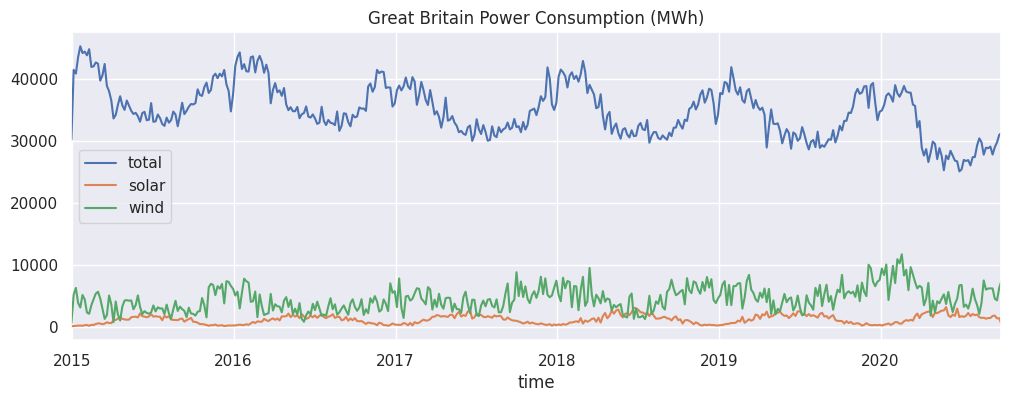

In [13]:
sns.set(rc={'figure.figsize':(12,4)})
df_5days_mean.plot(title="Great Britain Power Consumption (MWh)");

In [14]:
# aggregate the data to get the weekly max

df_weekly_max = df_filled[["total","solar","wind"]].resample("w").max(); df_weekly_max

,total,solar,wind
time,,,
2015-01-04 00:00:00+00:00,41894.0,913.0,1100.19
2015-01-11 00:00:00+00:00,53721.0,836.0,7648.00
2015-01-18 00:00:00+00:00,56296.0,1091.0,7580.00
2015-01-25 00:00:00+00:00,57168.0,1313.0,6496.00
2015-02-01 00:00:00+00:00,57678.0,1176.0,8254.00
...,...,...,...
2020-09-06 00:00:00+00:00,36762.0,6220.0,12108.72
2020-09-13 00:00:00+00:00,37449.0,7220.0,10329.98
2020-09-20 00:00:00+00:00,37568.0,7600.0,7893.95


<Axes: xlabel='time'>

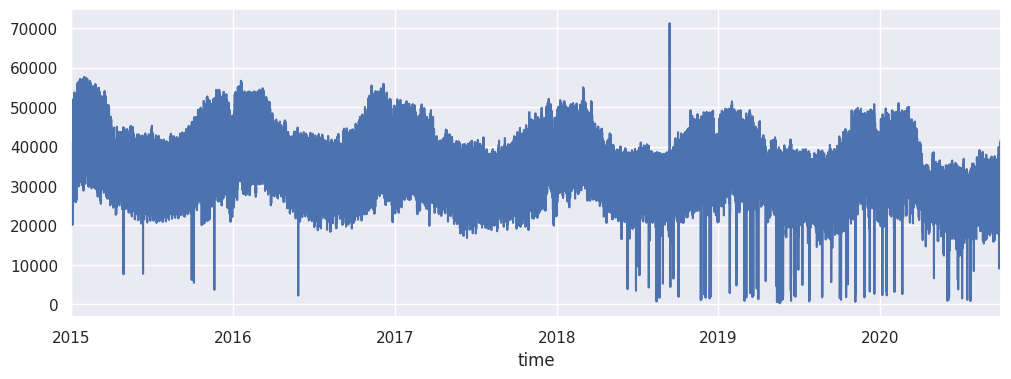

In [15]:
df_filled["total"].plot()

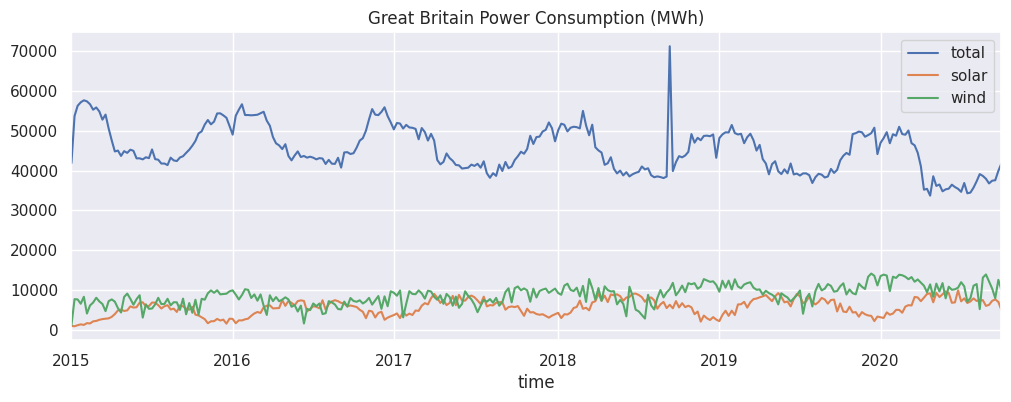

In [16]:
df_weekly_max.plot(title="Great Britain Power Consumption (MWh)");

In [17]:
# let's try to resample monthly and output the monthly median

df_monthly_median = df_filled[["total","solar","wind"]].resample("m").median(); df_monthly_median

,total,solar,wind
time,,,
2014-12-31 00:00:00+00:00,26758.0,13.0,781.580
2015-01-31 00:00:00+00:00,42480.0,0.0,4731.500
2015-02-28 00:00:00+00:00,45009.0,0.0,2998.000
2015-03-31 00:00:00+00:00,41826.5,31.5,3393.000
2015-04-30 00:00:00+00:00,36986.0,335.0,1835.500
...,...,...,...
2020-05-31 00:00:00+00:00,28442.5,1089.0,3609.340
2020-06-30 00:00:00+00:00,28414.5,953.5,4006.955
2020-07-31 00:00:00+00:00,28435.5,860.5,3991.835


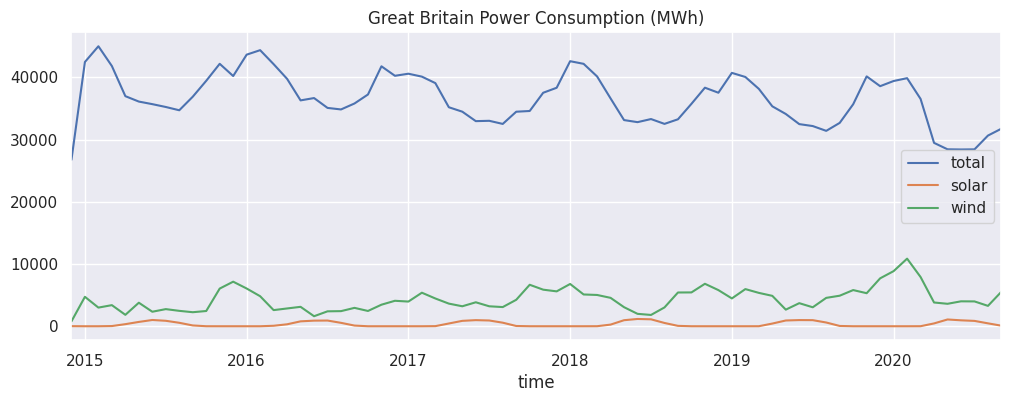

In [18]:
df_monthly_median.plot(title="Great Britain Power Consumption (MWh)");

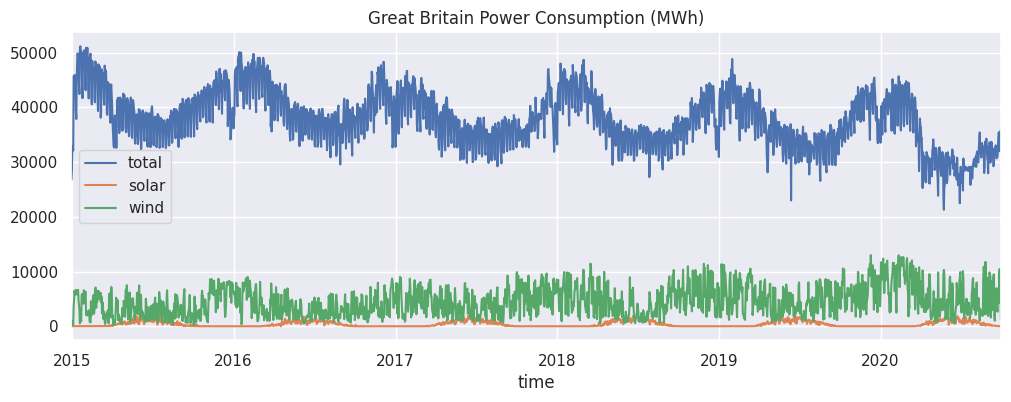

In [19]:
df_filled[["total","solar","wind"]].resample("d").median().plot(title="Great Britain Power Consumption (MWh)").figure.savefig("energy.png")

## 3. Rolling Windows

In [20]:
# center = True below means the rolling mean would be calculated and placed next
# to the center of the bin (with a width of 7 days). As a result, the first 3 and last
# 3 rows are NaNs.

df_7lags_rol = df_filled.rolling(window = 7, center = True).mean(); df_7lags_rol

,total,solar,wind
time,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN
2014-12-31 23:30:00+00:00,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,NaN,NaN,NaN
2015-01-01 00:30:00+00:00,26668.714286,13.0,782.114286
2015-01-01 01:00:00+00:00,26221.142857,13.0,782.648571
...,...,...,...
2020-09-30 21:30:00+00:00,28289.571429,142.0,6660.332857
2020-09-30 22:00:00+00:00,26390.285714,142.0,6682.922857
2020-09-30 22:30:00+00:00,NaN,NaN,NaN


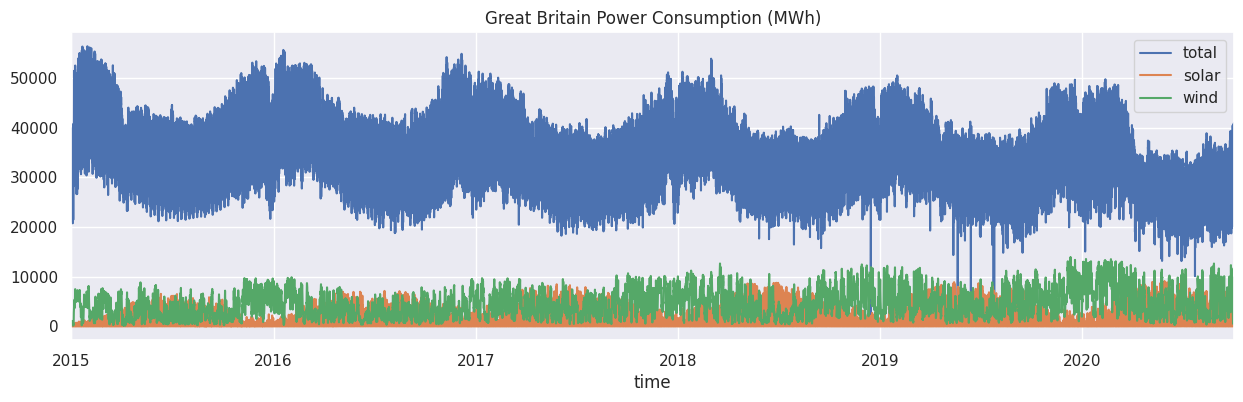

In [21]:
df_7lags_rol.plot(title="Great Britain Power Consumption (MWh)", figsize=(15,4));

<ipython-input-22-822235688970>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_filled["2018"].resample("H").median().plot()


<Axes: xlabel='time'>

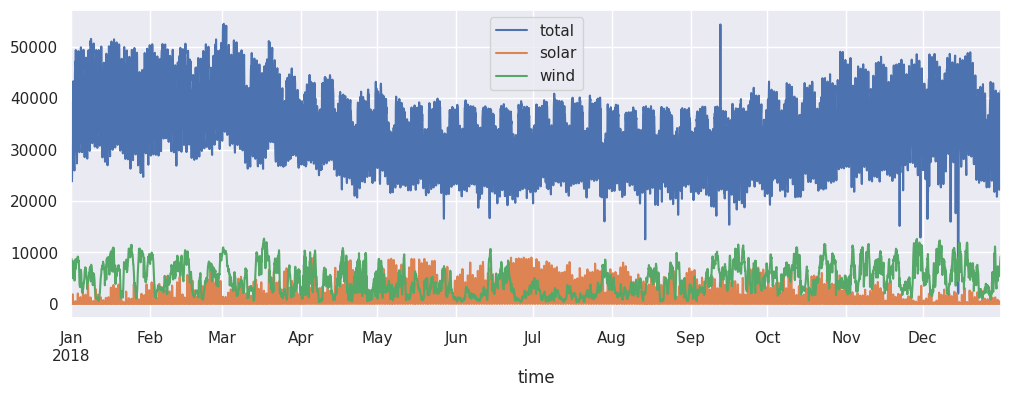

In [22]:
df_filled["2018"].resample("H").median().plot()

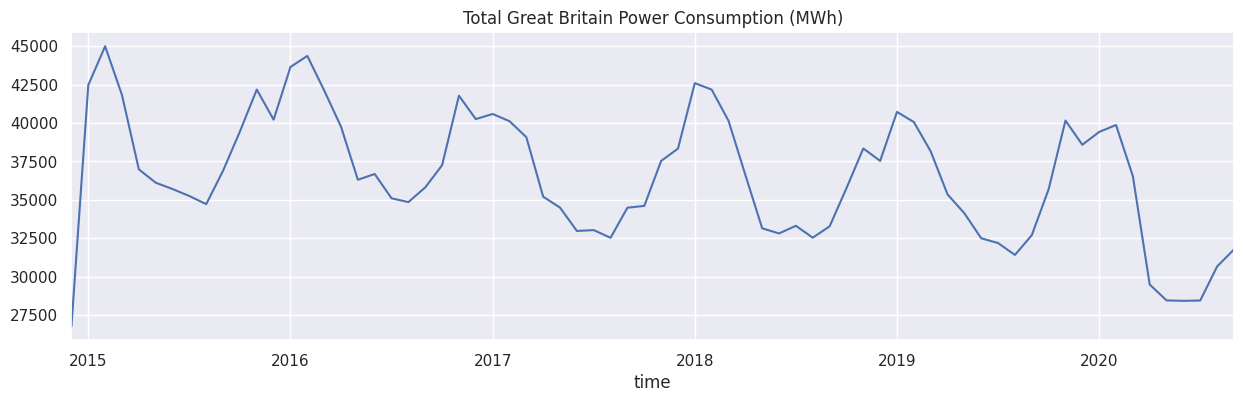

In [23]:
df_monthly_median["total"].plot(title="Total Great Britain Power Consumption (MWh)", figsize=(15,4)).figure.savefig("energy.png");

## Detrend with Differencing

In [24]:
# Pandas has a builtin function for detrending. We can easily get the differencing with different orders.
df_1st_diff=df_filled.resample("d").median().diff(periods=1)

<Axes: xlabel='time'>

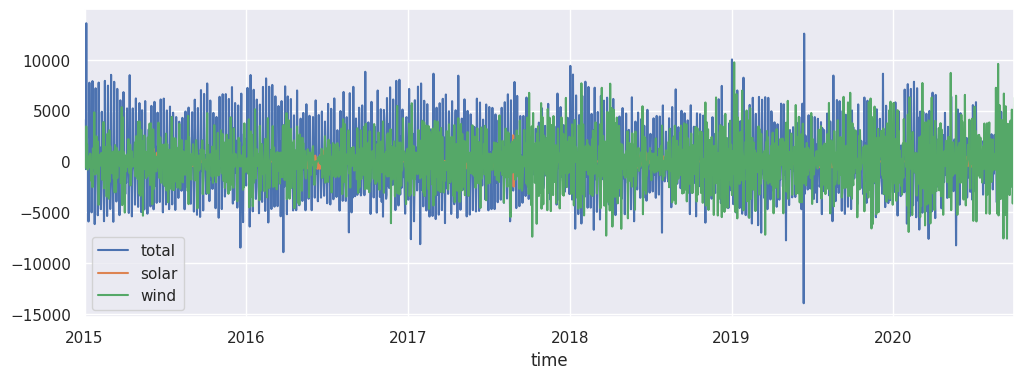

In [25]:
df_1st_diff.plot()

In [26]:
df_1st_diff = df_1st_diff[2:]

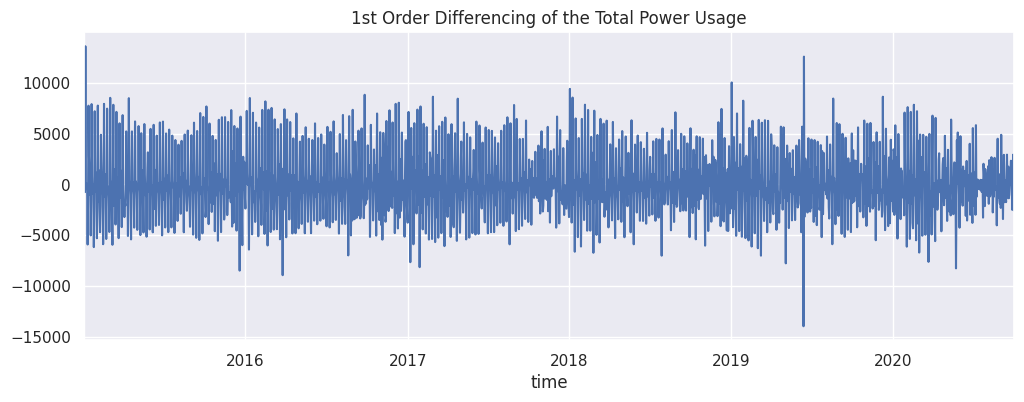

In [27]:
df_1st_diff["total"].plot(title="1st Order Differencing of the Total Power Usage").figure.savefig("energy.png");

In [28]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [29]:
kpss_test(df_1st_diff["total"])

Results of KPSS Test:
Test Statistic            0.05781
p-value                   0.10000
Lags Used                57.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


<ipython-input-28-f676df5b375f>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [30]:
# ADF test for checking the stationarity of a time series.
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [31]:
adf_test(df_1st_diff["total"])

Results of Dickey-Fuller Test:
Test Statistic                -1.218991e+01
p-value                        1.292847e-22
#Lags Used                     2.600000e+01
Number of Observations Used    2.072000e+03
Critical Value (1%)           -3.433510e+00
Critical Value (5%)           -2.862936e+00
Critical Value (10%)          -2.567513e+00
dtype: float64


In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

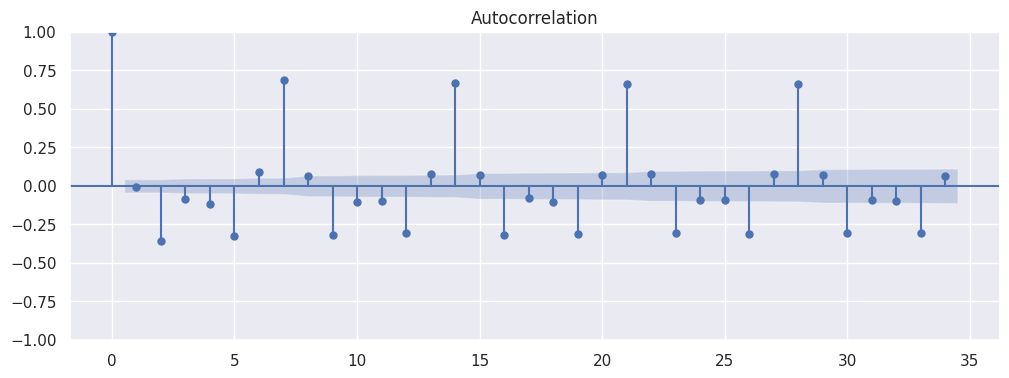

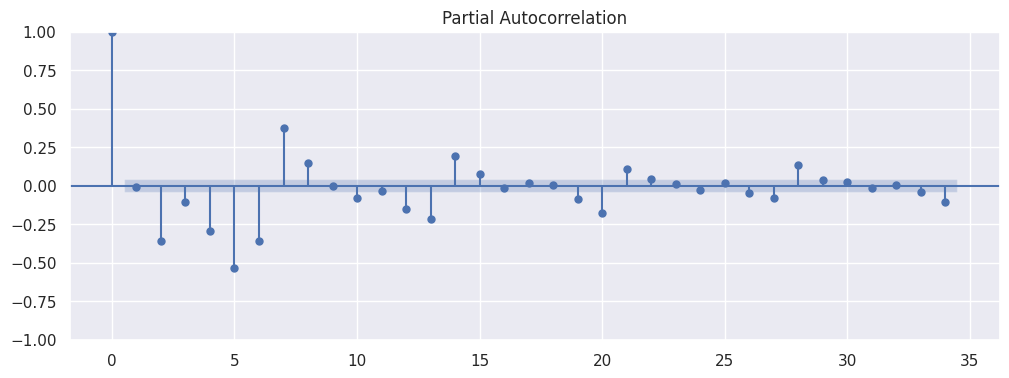

In [33]:
sns.set(rc={'figure.figsize':(12,4)})
plot_acf(df_1st_diff["total"]);
plot_pacf(df_1st_diff["total"]);

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

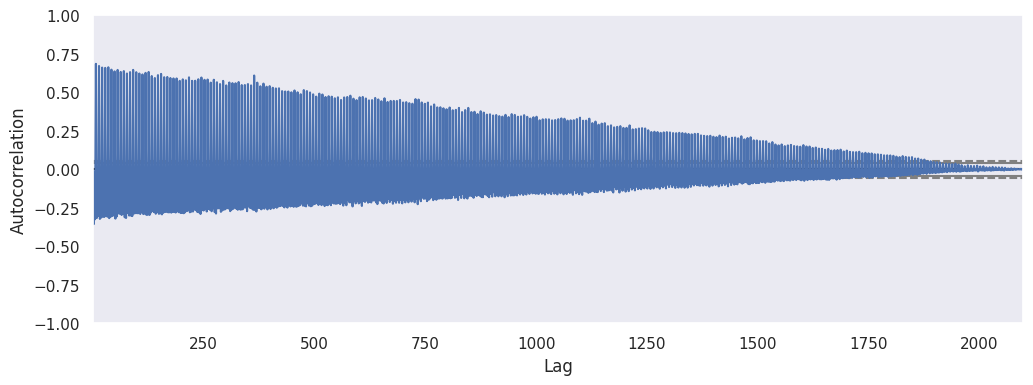

In [34]:
pd.plotting.autocorrelation_plot(df_1st_diff["total"])

In [35]:
df_filled['Month'] = df_filled.index.month

In [36]:
df_filled

,total,solar,wind,Month
time,,,,
2014-12-31 23:00:00+00:00,26758.0,13.0,781.58,12
2014-12-31 23:30:00+00:00,26758.0,13.0,781.58,12
2015-01-01 00:00:00+00:00,26758.0,13.0,781.58,1
2015-01-01 00:30:00+00:00,26758.0,13.0,781.58,1
2015-01-01 01:00:00+00:00,27561.0,13.0,781.58,1
...,...,...,...,...
2020-09-30 21:30:00+00:00,28837.0,142.0,7660.49,9
2020-09-30 22:00:00+00:00,25474.0,142.0,7779.93,9
2020-09-30 22:30:00+00:00,23735.0,142.0,1358.03,9


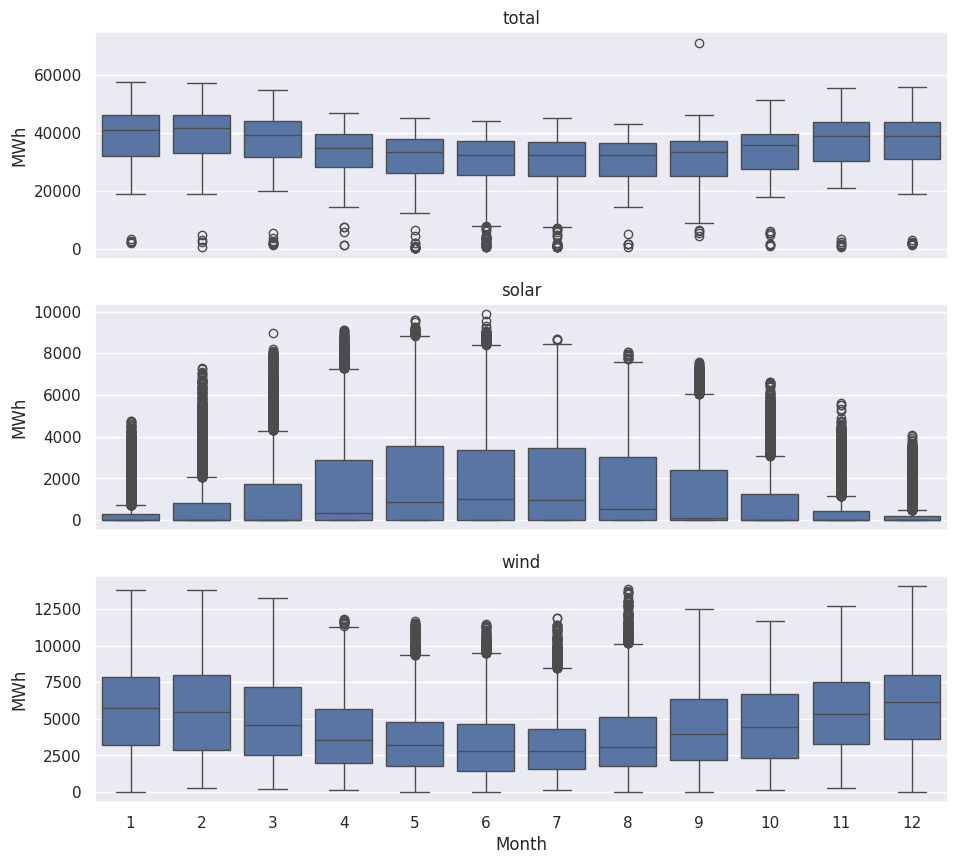

In [37]:
# this is just for visualization purpose.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['total', 'solar', 'wind'], axes):
    sns.boxplot(data=df_filled, x='Month', y=name, ax=ax)
    ax.set_ylabel('MWh')
    ax.set_title(name)
    # Keep the x-axis label for only the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
plt.savefig("energy.png")

## Import Modules and Make Time Series Stationary

In [38]:
#from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

ARIMA is only working for stationary time series, so we need to detrend the data first.

In [39]:
# We must skip the first NaN due to the differencing. If we don't, the NaN will contaminate the rest of the calculations.
X = df_filled["total"].resample("h").mean().diff(periods=1).values[2:]

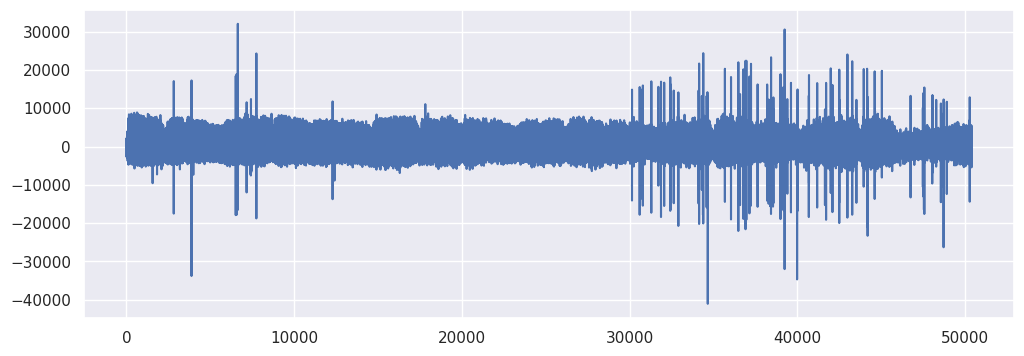

In [40]:
plt.plot(X)

In [41]:
#X_train, X_test = train_test_split(X, test_size=0.20, random_state=42)
X_train = X[:40319]
X_test = X[40319:]

In [42]:
X.shape

(50399,)

In [43]:
X_train.shape

(40319,)

In [44]:
X_test.shape

(10080,)

## AutoRegressive Model

In [45]:
lag_order = 1  # Specify the lag order for AutoReg
model_ar = AutoReg(X_train, lags=lag_order)

In [46]:
model_ar_fit = model_ar.fit()

In [47]:
ar_predict = model_ar_fit.predict(start=40319, end=50399)

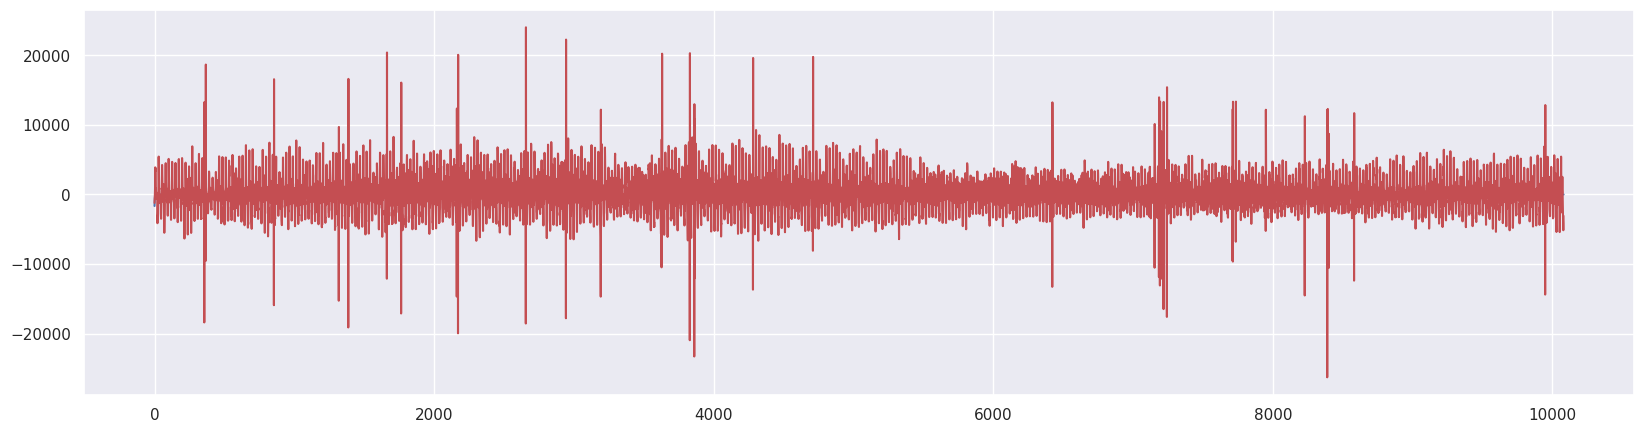

In [48]:
plt.figure(figsize=(20,5))
plt.plot(ar_predict)
plt.plot(X_test, c="r")

It seems there are some outliers at the very beginning of the time series. We might want to remove them.

## ARIMA Model

In [49]:
# ARIMA needs three parameters: p, d, q.
# p = periods taken for autoregressive model
# d = integrated order, difference
# q = periods in moving average model
model_arima = ARIMA(X_train, order=(2,1,0))

In [50]:
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

736497.1140323512


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


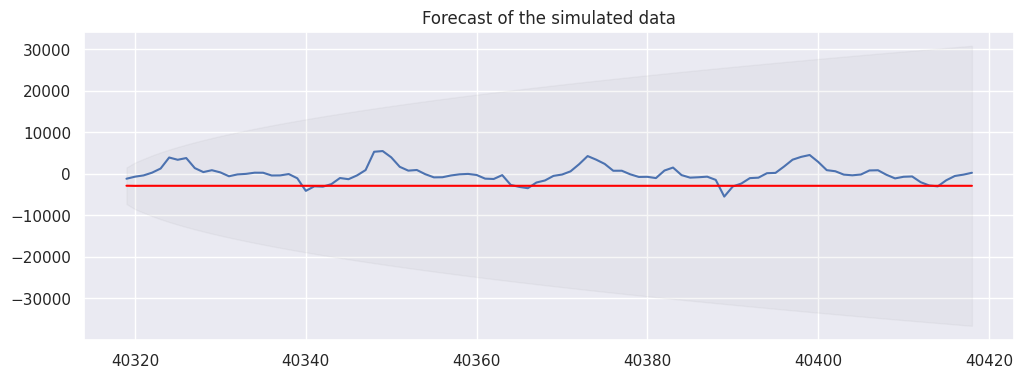

In [51]:
n_pred = 100 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast
forecast_results = model_arima_fit.get_forecast(steps=n_pred,alpha=0.03) # alpha: confidence level
pred_array, se_array, CI_array = forecast_results.predicted_mean, forecast_results.se_mean, forecast_results.conf_int(alpha=0.05)

plt.figure(figsize=(12,4))
pred_array_index = range(40319, 40419)
plt.plot(pred_array_index, X_test[:100])
plt.plot(pred_array_index, pred_array, color = "red")
plt.fill_between(pred_array_index, CI_array[:,0], CI_array[:,1], color = "k", alpha = .03 )
plt.title('Forecast of the simulated data')
plt.show()

## Find the Optimal Configuration for an ARIMA Model

In [52]:
# data  : the train data in forms of numpy array
# order : the maximum order of p, d, q for the grid search
# return: optimal (p, d, q)

# example: myorder = arima_order(X_train)

def arima_order(data, order=10, verbose=True):
  import warnings
  import itertools
  p=d=q=range(0,order)
  pdq = list(itertools.product(p,d,q))
  warnings.filterwarnings("ignore")
  aic_pair={}
  min_aic=9999999
  min_order=(0,0,0)
  for o in pdq:
    try:
      model_arima = ARIMA(data, order=o)
      model_arima_fit=model_arima.fit()
      fit_aic = model_arima_fit.aic
      if verbose: print(o, fit_aic)
      if not np.isnan(fit_aic):
        if min_aic>fit_aic:
          min_aic = fit_aic
          min_order=o
      aic_pair.update({o, model_arima_fit.aic})
    except:
      continue
  return min_order

In [53]:
arima_order(X, order=4)

(0, 0, 0) 1427879.8598015732
(0, 0, 1) 918787.2611807593
(0, 0, 2) 914255.7973839127
(0, 0, 3) 913301.487192869
(0, 1, 0) 926026.1858415538
(0, 1, 1) 922481.1678704282
(0, 1, 2) 921623.6577993146
(0, 1, 3) 914232.3900236285
(0, 2, 0) 971509.0020896234
(0, 2, 1) 926020.5104048513
(0, 2, 2) 922474.977663694
(0, 2, 3) 921617.8801745159
(0, 3, 0) 1029481.6262008126
(0, 3, 1) 971537.5634832165
(0, 3, 2) 926175.6324792167
(0, 3, 3) 929838.1674816514
(1, 0, 0) 913549.671954338
(1, 0, 1) 913540.2331986268
(1, 0, 2) 913145.2320476254
(1, 0, 3) 910743.2328074583
(1, 1, 0) 923207.0104518684
(1, 1, 1) 913541.5089586368
(1, 1, 2) 913532.038248324
(1, 1, 3) 913136.6669774035
(1, 2, 0) 950822.4407958054
(1, 2, 1) 923202.2349810868
(1, 2, 2) 916546.7314983546
(1, 2, 3) 922479.5541071664
(1, 3, 0) 993327.3462880051
(1, 3, 1) 950816.6519194641
(1, 3, 2) 928649.7830918926
(1, 3, 3) 5209.529710780036
(2, 0, 0) 913536.2129568901
(2, 0, 1) 913447.167679483
(2, 0, 2) 905225.8507641357
(2, 0, 3) 913145.466924

(0, 0, 0)

In [54]:
model_arima = ARIMA(X_train, order=(2, 0, 2))
model_arima_fit=model_arima.fit()

## Make Predictions with ARIMA Model

### Prediction for the stationary component

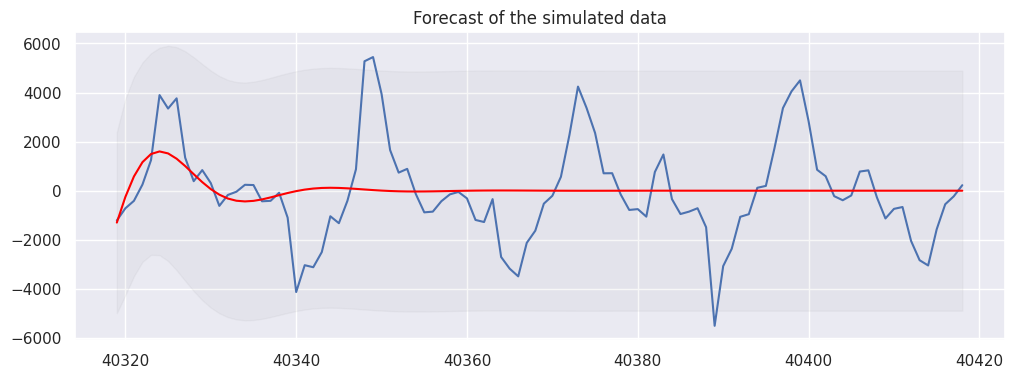

In [56]:
n_pred = 100 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast
forecast_results = model_arima_fit.get_forecast(steps=n_pred,alpha=0.03) # alpha: confidence level
pred_array, se_array, CI_array = forecast_results.predicted_mean, forecast_results.se_mean, forecast_results.conf_int(alpha=0.05)

plt.figure(figsize=(12,4))
pred_array_index = range(40319, 40419)
plt.plot(pred_array_index, X_test[:100])
plt.plot(pred_array_index, pred_array, color = "red")
plt.fill_between(pred_array_index, CI_array[:,0], CI_array[:,1], color = "k", alpha = .03 )
plt.title('Forecast of the simulated data')
plt.show()

### Inverse Difference
Remember that we did differencing once, so we will need to reverse that operation. The following function is to reverse a differenced time series.

In [57]:
def inverse_difference(h, x, interval=1):
	return x + h[-interval]

### Make predictions

In [60]:
history = [x for x in X]
day =1
forecast = model_arima_fit.get_forecast(steps=30)
forecast = forecast.predicted_mean
for y in forecast:
	inverted = inverse_difference(history, y)
	print('Day %d: %6.2f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: -4376.36
Day 2: -4629.90
Day 3: -4051.13
Day 4: -2889.16
Day 5: -1395.03
Day 6: 204.14
Day 7: 1722.60
Day 8: 3025.29
Day 9: 4029.85
Day 10: 4702.93
Day 11: 5052.28
Day 12: 5116.62
Day 13: 4954.58
Day 14: 4634.26
Day 15: 4224.16
Day 16: 3786.17
Day 17: 3370.84
Day 18: 3014.84
Day 19: 2740.47
Day 20: 2556.66
Day 21: 2461.16
Day 22: 2443.29
Day 23: 2486.99
Day 24: 2573.64
Day 25: 2684.56
Day 26: 2802.88
Day 27: 2914.85
Day 28: 3010.50
Day 29: 3083.80
Day 30: 3132.36
